In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn
import sklearn
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('mass-shootings-in-america.csv', sep=';')

In [3]:
data['DateTime'] = pd.to_datetime(data['Date'])
data['year'] = data['DateTime'].dt.year

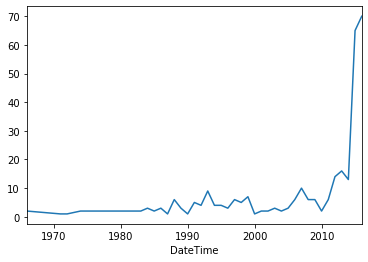

In [4]:
data.groupby(data['DateTime'].dt.year).size().plot()

In [45]:
lin_tab = data['year'].value_counts().reset_index().rename(columns={'index': 'year', 'year' : 'count'})
lin_tab['std_count'] = (lin_tab['count'] - lin_tab['count'].min()) / (lin_tab['count'].max() - lin_tab['count'].min())

In [46]:
lin_tab = lin_tab.sort_values(by=['year'])
lin_tab.head()

,year,count,std_count
0,2016,70,1.000000
1,2015,65,0.927536
2,2013,16,0.217391
3,2012,14,0.188406
4,2014,13,0.173913


In [47]:
reg = linear_model.LinearRegression()
arr = np.array([[y] for y in lin_tab['year']])
reg.fit(arr, lin_tab['count'])
reg.coef_[0]

0.5109188523749277

In [48]:
reg.predict([[2050]])

array([35.48865028])

In [49]:
X = np.array([[y] for y in lin_tab['year']])
y = lin_tab['count']
lw=2

# svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

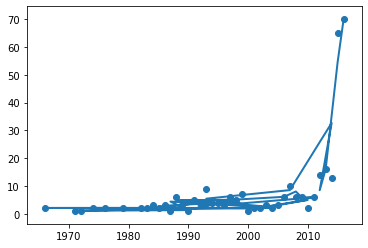

In [50]:
fig, ax = plt.subplots()
ax.plot(X, svr.fit(X, y).predict(X), lw=lw)
ax.scatter(X,y)
# ax.scatter(X[svr.support_], y[svr.support_], s=50,
#                 label='{} support vectors'.format('Polynomial'))
# ax.scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
#             y[np.setdiff1d(np.arange(len(X)), svr.support_)],
#                  facecolor="none", edgecolor="k", s=50)

In [51]:
plt.show()

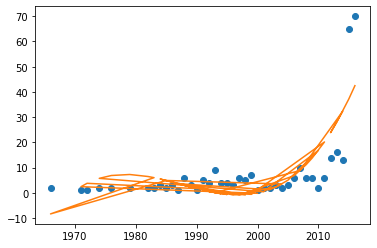

In [52]:
plt.plot(X,y,'o')

poly = PolynomialFeatures(degree=3)
poly_years = poly.fit_transform(X)
reg.fit(poly_years, y)

poly_pred = reg.predict(poly_years)
plt.plot(X,poly_pred)